In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from probes import CounterfactualAttentionProbe
from model import TinyBertModel

In [18]:
model = TinyBertModel()
probe = CounterfactualAttentionProbe(model)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [19]:
text_pair = (
    "The cat chased the mouse",
    "The mouse chased the cat"
)

In [20]:
# Analyze a specific layer and head


In [21]:
results = probe.compare_statements(text_pair[0], text_pair[1])

torch.Size([1, 2, 7, 7]) torch.Size([1, 2, 7, 64]) torch.Size([1, 2, 7, 64])
torch.Size([1, 2, 7, 7]) torch.Size([1, 2, 7, 64]) torch.Size([1, 2, 7, 64])
torch.Size([1, 2, 7, 7]) torch.Size([1, 2, 7, 64]) torch.Size([1, 2, 7, 64])
torch.Size([1, 2, 7, 7]) torch.Size([1, 2, 7, 64]) torch.Size([1, 2, 7, 64])


{'max_attention_diff': 0.11719083786010742,
 'mean_attention_diff': 0.013555740937590599,
 'attention_pattern_correlation': 0.9875074028968811,
 'value_output_correlation': 0.9960229396820068}

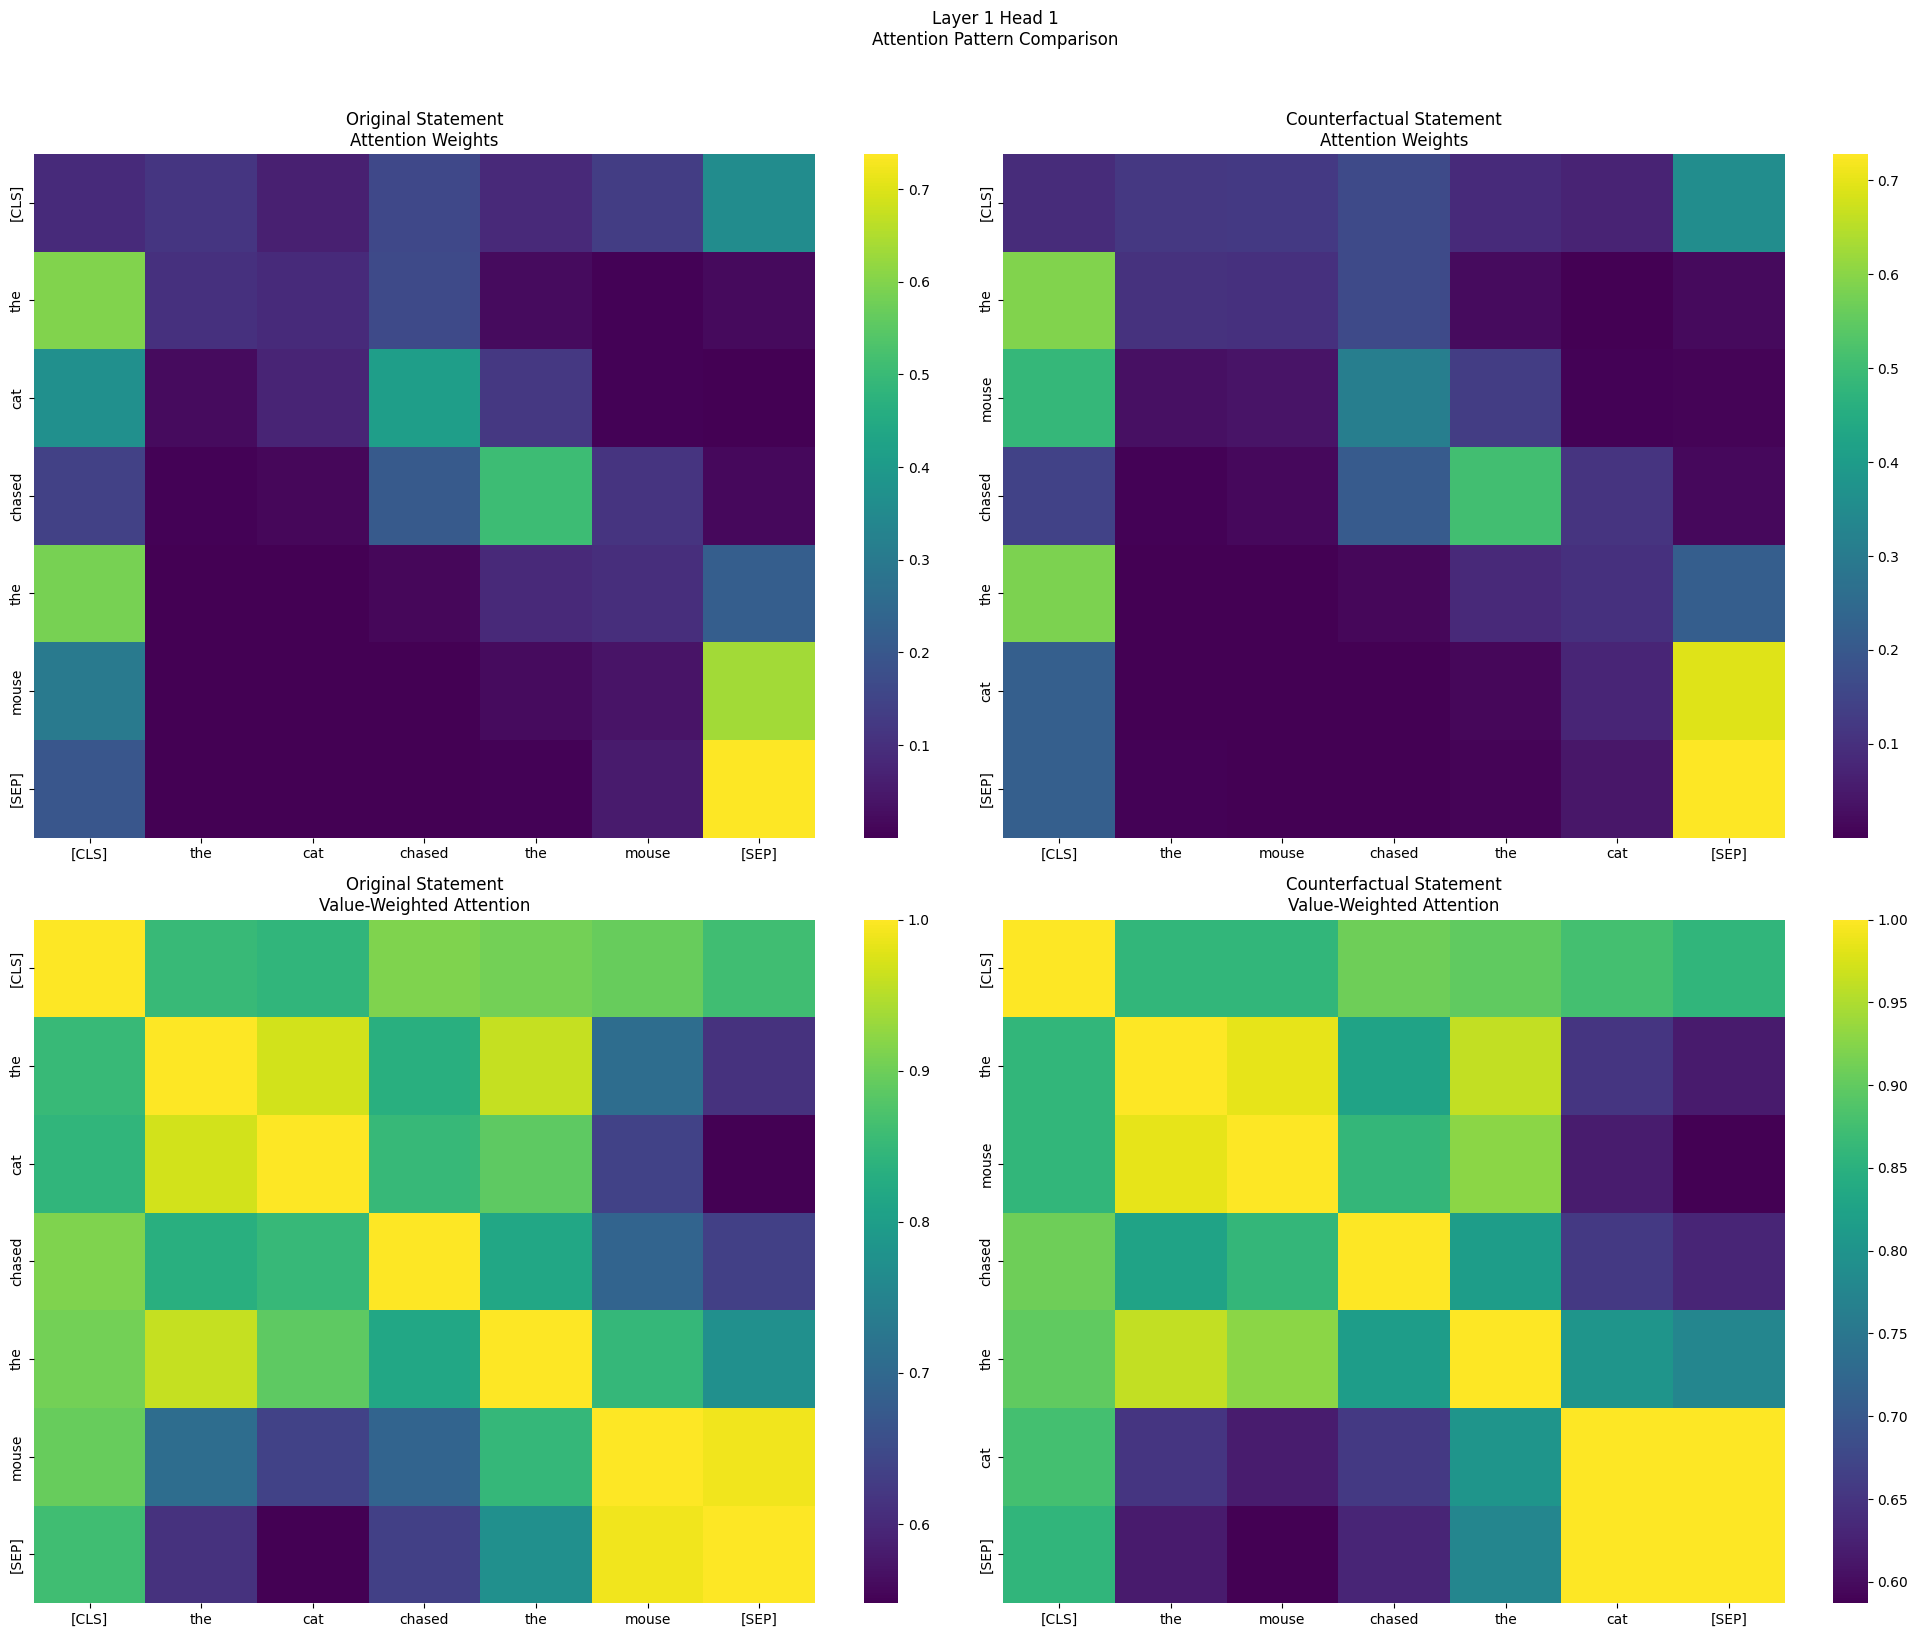

In [27]:
layer_idx = 1  # First layer
head_idx = 1   # First head
fig = probe.visualize_attention_diff(layer_idx, head_idx, 
                                       results['original'], 
                                       results['counterfactual'])
probe.compute_attention_differences(layer_idx, head_idx, 
                                       results['original'], 
                                       results['counterfactual'])